In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


df= pd.read_csv("/Users/sa19/Desktop/Phase-1-Portfolio-Project/csv/nyc_all_parks_filtered.csv")




In [2]:
df.shape

(18802, 9)

In [3]:
df.describe()

,attendance
count,18656.000000
mean,95.027819
std,296.508019
min,-42.000000
25%,8.000000
50%,25.000000
75%,76.000000
max,7995.000000


In [4]:
# list all columns in my dataset
df.columns.tolist()

['date',
 'borough',
 'location',
 'event_type',
 'category',
 'attendance',
 'audience',
 'classification',
 'time']

In [5]:
df.isnull().sum()

date                 0
borough              0
location             0
event_type        7039
category            24
attendance         146
audience          7039
classification    3123
time                 0
dtype: int64

In [6]:
#Drop all nulls, want to 
data_cleaned = df.dropna()


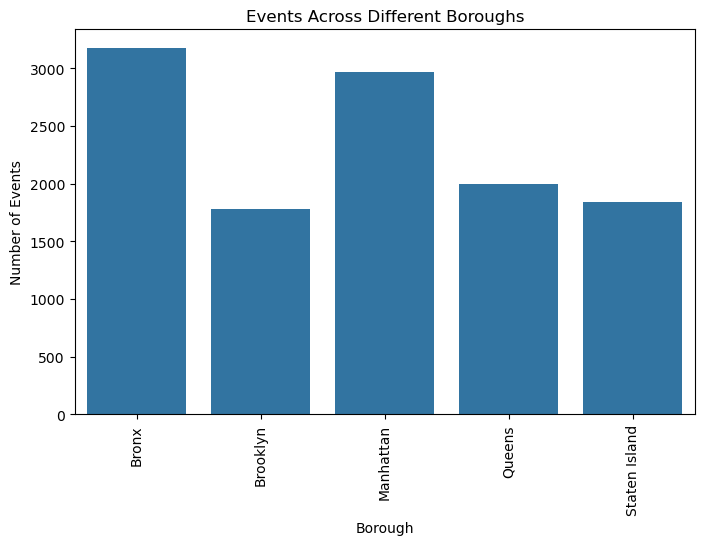

In [7]:

event_counts = df.groupby("borough")["event_type"].count().reset_index() 

# swap out attendents and use count of event_type as y-axis

plt.figure(figsize=(8, 5))

# Count the number of events per borough
event_counts = df.groupby("borough")["event_type"].count().reset_index()
sns.barplot(data=event_counts,x="borough", y="event_type")

plt.xticks(rotation=90)  
plt.title("Events Across Different Boroughs")
plt.xlabel("Borough")
plt.ylabel("Number of Events")
plt.show()


How does the event distribution vary across different boroughs?

The Bronx has hosted over 3,000 events, making it one of the most popular boroughs for event gatherings. This suggests that the Bronx could be a key destination for hosting events.

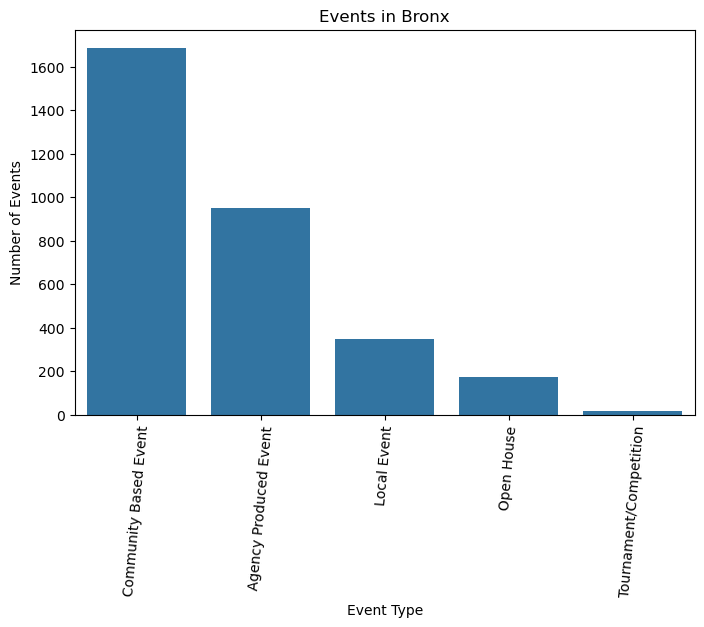

In [8]:

borough_name = "Bronx"
borough_data = df[df["borough"] == borough_name]

# Count the occurrences of each event_type in the Bronx
event_counts = borough_data["event_type"].value_counts().reset_index(name='event_count')

# Rename columns for clarity
event_counts.columns = ['event_type', 'event_count']
plt.figure(figsize=(8, 5))
sns.barplot(data=event_counts, x="event_type", y="event_count")

# Customize plot
plt.xticks(rotation=85)
plt.title(f"Events in {borough_name}")
plt.xlabel("Event Type")
plt.ylabel("Number of Events")
plt.show()



Which types of events were most frequently held in the Bronx?

Among the five event types in the Bronx, community-based events were the most frequently held. 


In [15]:
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

borough_name = "Bronx"
bh_bx = df[df["borough"] == borough_name]
# Convert to datetime format
bh_bx["date"] = pd.to_datetime(bh_bx["date"]) 
 # Extract YYYY-MM
bh_bx["year_month"] =bh_bx["date"].dt.to_period("M").astype(str) 

/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_17570/3306231196.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bh_bx["date"] = pd.to_datetime(bh_bx["date"])
/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_17570/3306231196.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bh_bx["year_month"] =bh_bx["date"].dt.to_period("M").astype(str)


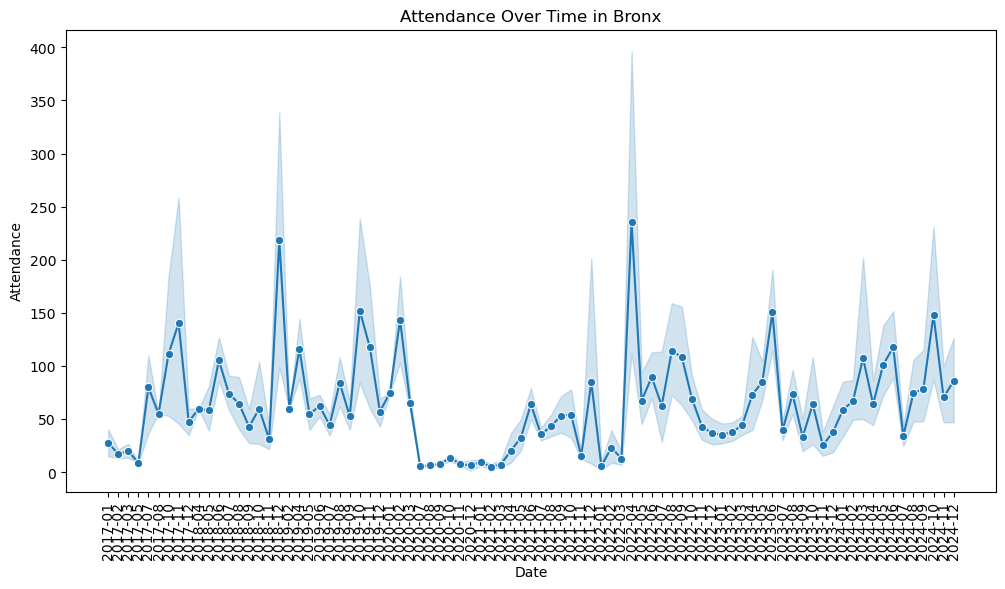

In [17]:


plt.figure(figsize=(12, 6))
sns.lineplot(data=bh_bx, x="year_month", y="attendance", marker="o")

# Title and labels
plt.title("Attendance Over Time in Bronx")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation=90)  

# Show plot
plt.show()


When observing attendance overtime in the Bronx we can see a dip in attendance in 20220 than an upward trend in 2021.

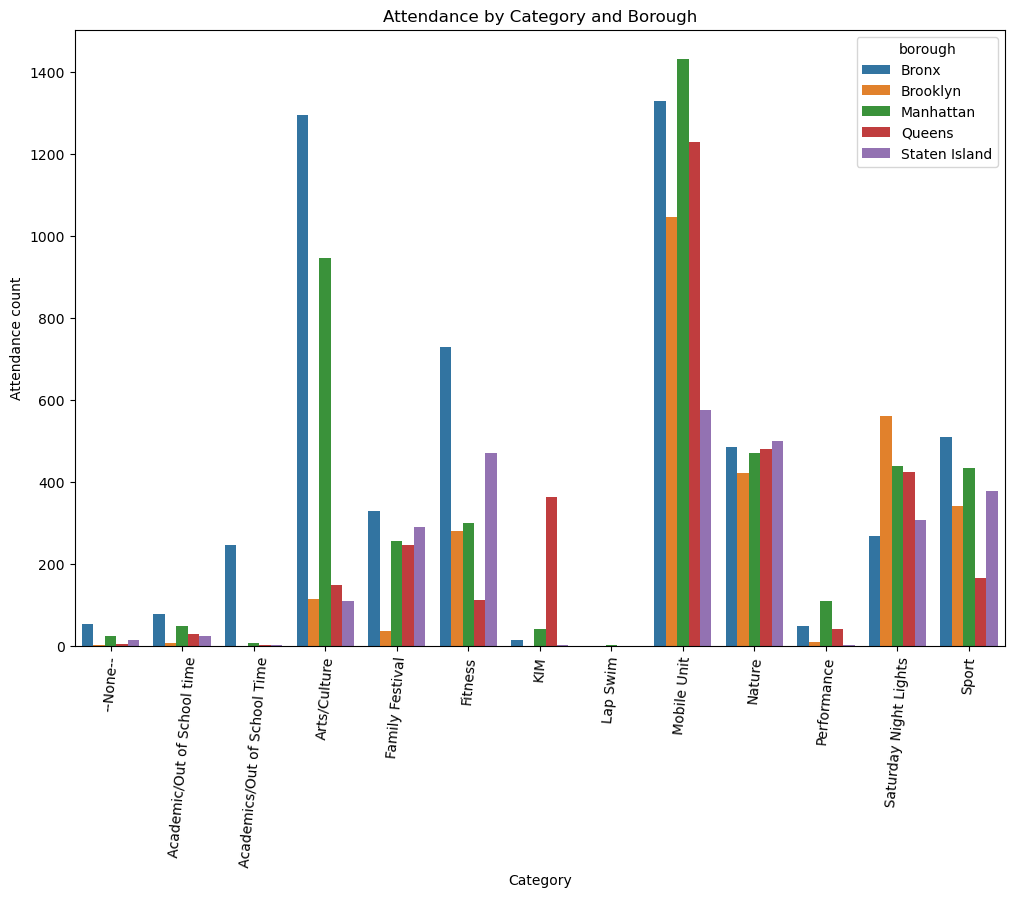

In [9]:
# Aggregate data: compute the mean attendance per category
g_data = df.groupby(['category', 'borough'])['attendance'].count().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=g_data, x="category", y="attendance", hue="borough")

plt.xticks(rotation=85)
plt.title("Attendance by Category and Borough")
plt.xlabel("Category")
plt.ylabel("Attendance count")
plt.show()

Among all categories, mobile unit events recorded the highest attendance, with Manhattan's mobile units achieving the highest attendance overall.In the context of event categories, mobile units can refer to any event or service setup that is designed to move from place to place rather than being fixed in one location